# THE DATA INCUBATOR CAPSTONE PROJECT
### Title : Using Machine Learning to predict the Wine Quality of Wine

### Justification for the project

- Wine has been classified as a major promoter of health due to its anti-inflamatory and antioxidant properties. These properties have been linked to health benefits such as longevity, cardiovascular health and prevention of chronic diseases. 

- Wine is very popular and has been consumed for centuries. Statistics show that in 2020 alone, over 234 million hectoliters of wine was consumed globally. This demonstrates how the wine industry has played a very important role in the history of mankind.

- Wine quality is a very big deal, no wonder there so many wine tasting events and we have so many wine critics. Thes critics try to define what good wine is and what metrics should be used to determine the quality of wine.

- However, there hasn't been any consensus amongst wine critics on what "quality wine" is and what metrics should be used to decide. Standardizing this process has become a very important to the wine industry and the comsumers as well. Nobody wants to spend money on bad wine and the manufacturers would be happy if there was a way to measure the quality of wine before mass production.


- Wine is made form grapes and most and experts can identify quality wine based on smell, flavor, acidity, alcohol content and so many other characteristics. There is a lot of data from experts who have over the years determined the quality of wine based on its physio-chemical properties. With the availability of such data, data scientists can create machine learning models to predict wine quality.

In this project, the goal is to obtain wine quality data from Kaggle, clean the data, do some descriptive analysis, create a predictive model and make sense of the data as well as make inferences.

# Download Wine Quality Data
**The data was downloaded from Kaggle using the Kaggle API, installed as a pyhon module**

In [ ]:
# import kaggle api module
# initialize module
# authenticate module
# retrieve wine quality data kaggle api
# it authomatically downloads to the working current directory
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_file("hufe09/winequality", "winequality-white.csv")

# Load Libraries

In [1]:
# Import relevant libraries
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Read Wine Quality Data as CSV

In [2]:
# Read in dataset
# Print the top 5 columns (head)
wine_df = pd.read_csv('winequality-white.csv', sep=';')
wine_df.head(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# Print the last columns(tail)
wine_df.tail(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


**So far the data looks consistent both at the top and bottom of the data. Data does not need to be normalized, but it is important to remember that.**

In [4]:
# Check for null values
#wine_df.isnull().sum()
#wine_df = wine_df.dropna()

In [5]:
# Get general information about the data structure 
#print(wine_df.shape)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Brief description of the dataset

The wine quality data contains some physio-chemical properties which would be used as features by our Machine Learning algorithm to create a predictive model. These properties are 12 (as seen above) in number and the presence or absence of each makes the quality if wine better. For example, the fixed acidity level ensures the wine does not evaporate and this is usually a good attribute for wines.

**There were no null values in this dataset, and the rows and columns look alright. However, I recognize that data cleaning is very vital as it improves overall productivity. A clean data will ensure that outdated or incorrect information and missing data are removed so one can end up with the best possible data quality.**

In [6]:
# Do a statistical summary
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
len(wine_df['quality'].unique())

7

**We see that the wines have been classified into 7 unique classes**

# Exploratory Data Analysis

**Generate some descriptive plots!**

Text(0.5, 0, 'Wine Quality')

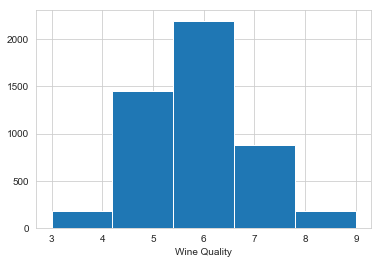

In [8]:
sns.set_style('whitegrid')
wine_df['quality'].hist(bins=5)
plt.xlabel('Wine Quality')

**This is the distribution of wine quality scores in the data**

In [10]:
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1d207233c8>,
      dtype=object)

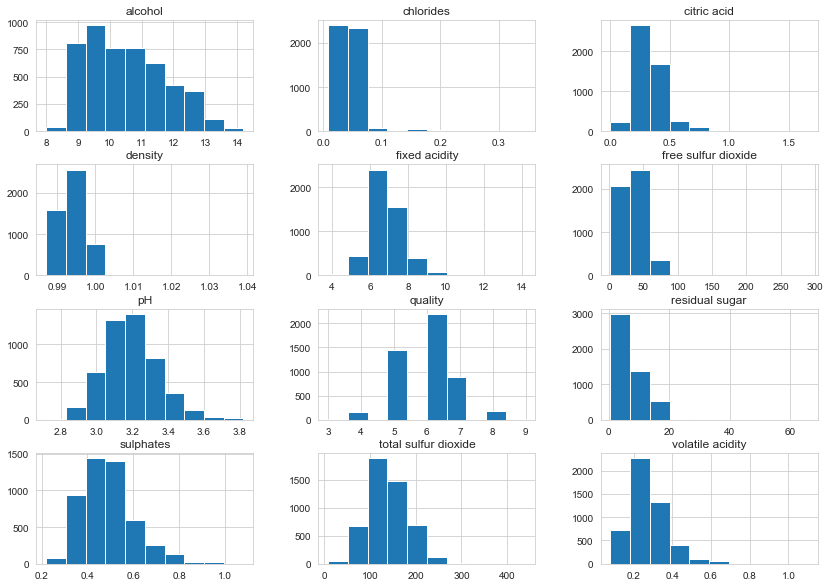

In [11]:
wine_df.hist(figsize=(14,10))

**Histogram of all 12 features to see thier distributions. The alcohol data seems to have a good distribution**

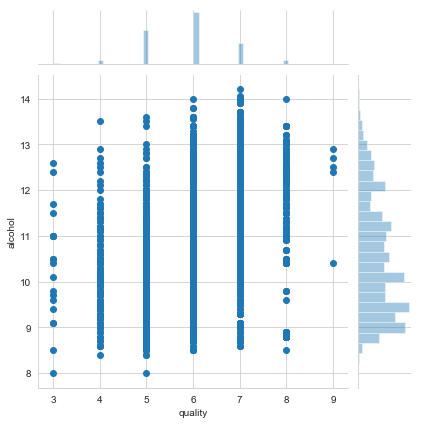

In [31]:
sns.jointplot(x='quality',y='alcohol',data=wine_df)

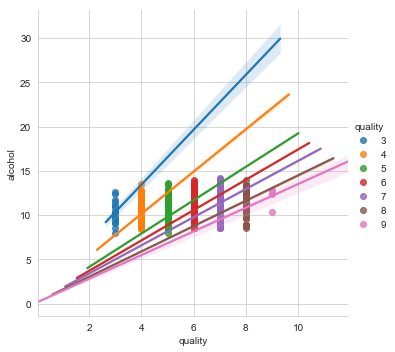

In [27]:
sns.lmplot(x="quality", y="alcohol", data=wine_df, hue="quality")

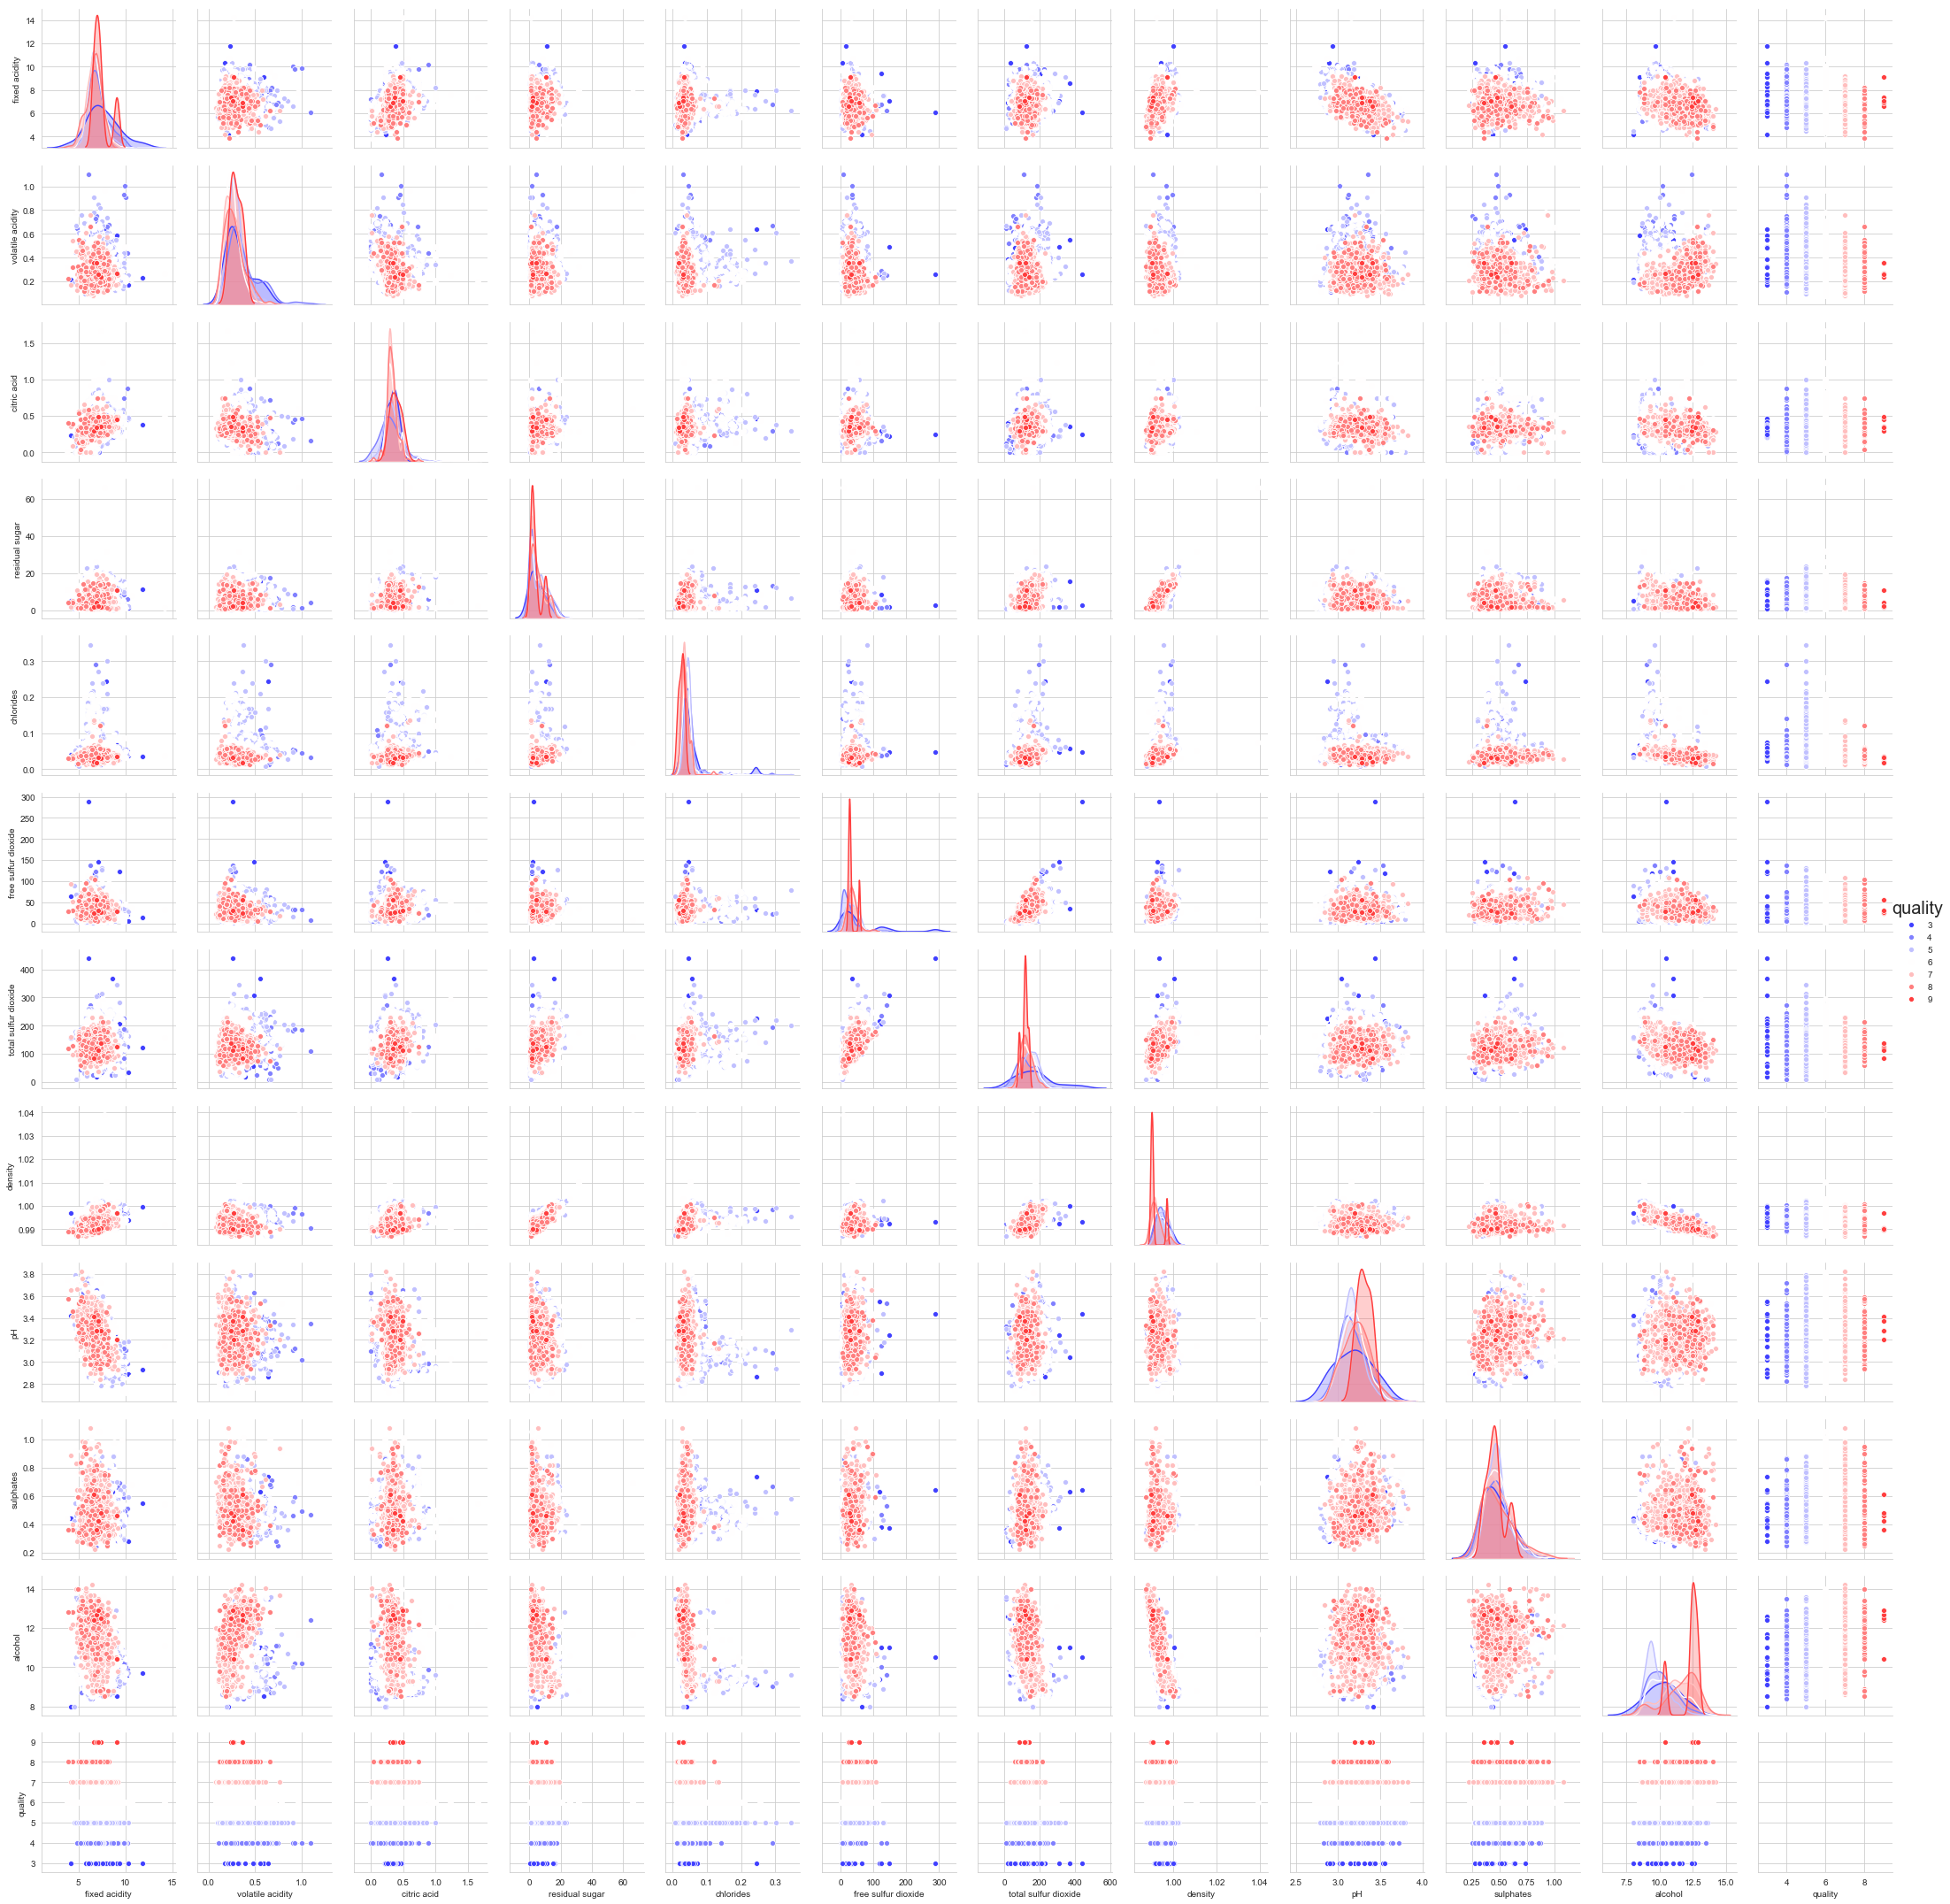

In [38]:
g = sns.pairplot(wine_df, hue ='quality', palette='bwr')
g._legend.get_title().set_fontsize(20)    
plt.show()

**Looking at the pairplots, there seem to be some mild correlation between some variables though not very structured and not clear to read. So a correlation plot will be made to get a better idea.**

In [ ]:
# Correlation Analysis

In [33]:
# Calculate correlations
wine_corr = wine_df.corr()
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


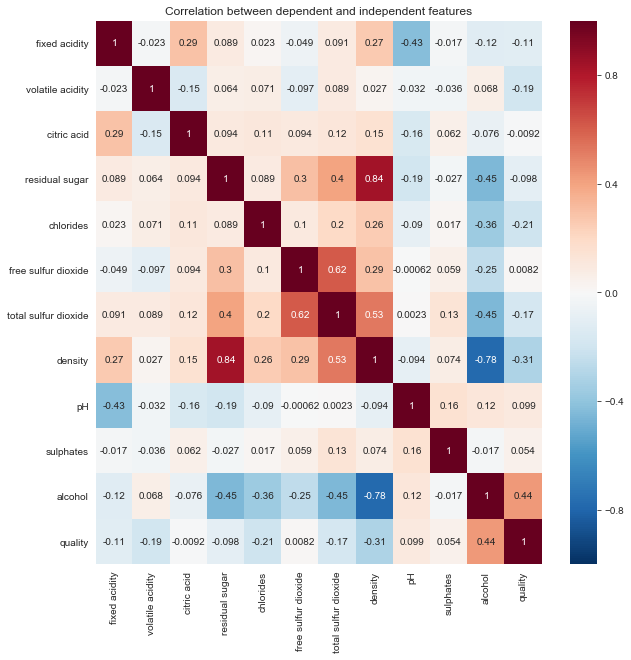

In [34]:
# Plot correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(wine_corr, cmap='RdBu_r', annot=True, vmin=-1)
plt.title('Correlation between dependent and independent features')
plt.show()

**Some variables are more correlated than others but alcohol and quality seems to be the most correlated. So a sorted list of everything correlated to quality will be printed below.**

In [35]:
wine_corr.quality.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

**From the heatmap above, we see that quality of wine has a top positive correlation with alcohol followed by PH and then sulphates. However, these correlations are medium and not very strong. The plot also shows that density has a mild negative correlation with quality.**


In [85]:
# get information about the most correlated variables
#absolute_corr = wine_df.corr().abs()
#unstacked_corr = absolute_corr.unstack()
#sort_corr = unstacked_corr.sort_values(kind="quicksort")
#dat_corr = pd.DataFrame(sort_corr)
#most_corr = dat_corr[(dat_corr > 0.5).any(1)]
#print(most_corr[(most_corr < 1).any(1)])

                                                  0
total sulfur dioxide density               0.529881
density              total sulfur dioxide  0.529881
total sulfur dioxide free sulfur dioxide   0.615501
free sulfur dioxide  total sulfur dioxide  0.615501
density              alcohol               0.780138
alcohol              density               0.780138
density              residual sugar        0.838966
residual sugar       density               0.838966


In [ ]:
#** Here we show a list of the most correlated variables.** The goal is to see how these variables can be used to 

# This next section is where the data is normalized and some regression models will be fit


## This is still work in progress!!

### REGRESSION ANALYSIS
##### MODEL FITTING
We will be run a statistical model - linear regression to predict the quality of a given wine. We also will be finding out what makes a good wine based on the constituents - features we have.

The independent features are all the features except quality which will be the predictor feature. Before we proceed with fitting our model, we will use a correlation heatmap to get the correlation between each of the independent features and the dependent.


In [ ]:
# Assign predictor feature to y
y = wine_df['quality']

In [ ]:
# drop 'quality data' as it is our dependent variable - y axis
del wine_df['quality']


In [ ]:
wine_df

In [ ]:
# Assign wine_df to X - Independent features
X = wine_df.iloc[:, 0:10]
X.head()

In [ ]:
# add constant to get intercept
X_withconstant = sm.add_constant(X)

# 1. Instantiate model
myLinReg = sm.OLS(y, X_withconstant)

#2. Fit the model (this returns a separate object with the parameters)
myLinReg_results = myLinReg.fit()
myLinReg_results.summary()

In [ ]:
# check multicolinearity
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

Here we will drop columns with high VIF which signify multicolinearity. we will drop 'density' and 'PH'. From the correlation heat map above, we see that 'density' and 'PH' are weakly correlated with 'quality'. Hence it will be preoper to drop them

In [ ]:
# Drop density and PH
wine_df.drop(['pH', 'density'], axis=1, inplace=True)

In [ ]:
wine_df.head()

In [ ]:
# Assign wine_df to X1
X1 = wine_df

# add constant to get intercept
X_withconstant1 = sm.add_constant(X1)

# 1. Instantiate model
myLinReg1 = sm.OLS(y, X_withconstant1)

#2. Fit the model (this returns a separate object with the parameters)
myLinReg1_results = myLinReg1.fit()
myLinReg1_results.summary()

In [ ]:
# check multicolinearity
pd.Series([variance_inflation_factor(X1.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

In [ ]:
# Drop density and PH
wine_df.drop(['fixed acidity', 'total sulfur dioxide'], axis=1, inplace=True)

In [ ]:
wine_df.head()

In [ ]:
# Assign wine_df to X1
X2 = wine_df

# add constant to get intercept
X_withconstant2 = sm.add_constant(X2)

# 1. Instantiate model
myLinReg2 = sm.OLS(y, X_withconstant2)

#2. Fit the model (this returns a separate object with the parameters)
myLinReg2_results = myLinReg2.fit()
myLinReg2_results.summary()

In [ ]:
# check multicolinearity
pd.Series([variance_inflation_factor(X1.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

In [ ]:
wine_df2 = wine_df.drop(['sulphates', 'volatile acidity'], axis=1)

In [ ]:
wine_df2.head()

In [ ]:
# Assign wine_df to X1
X3 = wine_df

# add constant to get intercept
X_withconstant3 = sm.add_constant(X3)

# 1. Instantiate model
myLinReg3 = sm.OLS(y, X_withconstant3)

#2. Fit the model (this returns a separate object with the parameters)
myLinReg3_results = myLinReg3.fit()
myLinReg3_results.summary()

We will drop 'chlorides' as it's P-value is greater than 0.05 which suggests that changes in it is not associated with changes in the response - 'quality'.

In [ ]:
wine_df3 = wine_df2.drop(['chlorides'], axis=1)

In [ ]:
wine_df3.head()

In [ ]:
# Assign wine_df to X1
X4 = wine_df3

# add constant to get intercept
X_withconstant4 = sm.add_constant(X4)

# 1. Instantiate model
myLinReg4 = sm.OLS(y, X_withconstant4)

#2. Fit the model (this returns a separate object with the parameters)
myLinReg4_results = myLinReg4.fit()
myLinReg4_results.summary()

### CLASSIFICATION

Here, we are are going to treat the problem as a classification problem. We are trying to predict the quality of wine. To that effect, lets check the unique classes of wine available


In [ ]:
# View data
wine_df.head()

In [ ]:
# Check unique quality instances
wine_df.quality.value_counts().sort_index()

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(wine_df.quality, bins=7)
plt.title('Distribution of wine quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Bar chart showing counts of different qualities of wine
plt.figure(figsize=(8,6))
plt.title('Distribution of wine quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
ax = sns.countplot(x="quality", data=wine_df)

From the above graphs, we see that we have an unbalanced data hence it may alter our classification. More of our observations fall under classes 5 and 6. We will reduce the number of classes to 3 - 0, 1 and 3 for low, medium and high. We will create a new feature - 'wine_quality' with 3 classes from the 'quality' column. The following is the new classification
Classes 3 and 4 -> 0,
Classes 4 - 7 -> 1 and
Classes 8 and 9 -> 2

In [ ]:
# Re-sample quality column
conditions = [(wine_df['quality'] >= 7),
            (wine_df['quality'] < 5)
]
rating = [2,0]
wine_df['rating'] = np.select(conditions, rating, default = 1)


In [ ]:
# Check distribution of datapoints on 'quality'
wine_df.rating.value_counts().sort_index()

In [ ]:
wine_df.head()

In [ ]:
# Bar chart showing counts of different ratings of wine
plt.figure(figsize=(8,6))
plt.title('Distribution of wine quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
ax = sns.countplot(x="rating", data=wine_df)

Clearly, we see that our dataset is highly umbalance. A ubiquitous technique used in dealing with umbalance data is 'resampling'. In resampling, we either upscale the minority class (over-sample) or we downscale the majority class (under-sample). That way we will be able to attain a balance.  We will do some re-sampling to make sure our result doesn't get skewed by the imbalance of the 'rating column'. 

The predictor variable - 'y' will be 'rating' while all the other variables except 'quality' will be the dependent variables - 'X'.

In [ ]:
# assign 'rating' to y
y = wine_df.rating

# assign independent variables to X 
X = wine_df.iloc[:, 0:11]
X.head()

In [ ]:
y.head()

In [ ]:
#Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
# Transform data
scaler = StandardScaler()
scaler.fit(X_train)
#X_train = scaler.transform(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

For training our model, we will be using KNN and Decision trees algorithms after which we will compare their performances to see the best performing model.

### K-Nearest Neighbors

In [ ]:
# Default model
#Instantiate 
my_knn = KNeighborsClassifier()
# Fit model
my_knn.fit(X_train, y_train)

# Score model on train and test sets
print('Train Score: ', my_knn.score(X_train, y_train))
print('Test Score: ', my_knn.score(X_test, y_test))



Clearly, our model is overfitting as there is a margin between the train and the test score. In order to reduce the overfitting of our decision tree model, we will optimise for n_neighbors. That way will get the best accuracy score without overfitting our model

In [ ]:
%%time
# Grid Search
from sklearn.model_selection import GridSearchCV # import GridSearch package

k_values = list(range(1, 40, 2))
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan']
grid_params = {
    'n_neighbors': k_values, 
    'weights': weights,
    'metric': metric
}
my_search = GridSearchCV(
            KNeighborsClassifier(),
            grid_params,
            verbose = 1,
            cv = 10,
            n_jobs= -1, 
            scoring = 'accuracy')

grid_model = my_search.fit(X_train, y_train)

In [ ]:
# Best model
grid_model.best_score_

In [ ]:
# Check model estimator
grid_model.best_estimator_

In [ ]:
# Check best mix of parameters
grid_model.best_params_

In [ ]:
# Display scores for different parameter mix 
grid_df = pd.DataFrame(grid_model.cv_results_)[['param_n_neighbors', 'param_metric', 'param_weights', 'mean_test_score']]
grid_df

In [ ]:
# Assign best estimator model to variable
my_knn = grid_model.best_estimator_
score_test_knn = my_knn.score(X_test, y_test)
score_knn = grid_model.best_score_
print('Accuracy score: ', grid_model.best_score_)
print('Test accuracy score: ', score_test_knn)

In [ ]:
# Get model predictions on y
knnModel_predicted = my_knn.predict(X_test)
knnModel_predicted

In [ ]:
# Plot a graph of predicted/actual class labels
x=np.linspace(1, 100, 100)
plt.figure(figsize=(12,6))
plt.plot(x, knnModel_predicted[:100], label='predicted values', marker='X')
plt.plot(x, y_test[:100], label='actual values', marker='D')
plt.title('Graph for KnnModel Predicted/Actual class labels', **title_font)
plt.xlabel('100 random Predicted/Actual values', **axis_font)
plt.ylabel('CLuster labels/Classes', **axis_font )
plt.legend()
plt.grid()
plt.show()

From the above graph, where we have overlap of points shows us where our model made the right predictions on unseen data. Out of the 100 randomly selected points, there are only 12 points which don't overlap. This correlates with our accuracy score of 84%.

### Decision Tree

In [ ]:
# Fit in model for Decision tree
my_tree = DecisionTreeClassifier()
my_tree = my_tree.fit(X_train, y_train)

# Print accuracy score
print(my_tree.score(X_train, y_train))
print(my_tree.score(X_test, y_test))

In [ ]:
# Get maximum depth of decision tree to use in hyper parameter optimization 
max_depth = my_tree.get_depth()
max_depth

In [ ]:
%%time
# Grid Search
from sklearn.model_selection import GridSearchCV # import GridSearch package

max_depth = list(range(1, 48, 2))
min_samples_leaf = list(range(1, 10))
criterion = ['gini', 'entropy']
grid_params = {
    'max_depth': max_depth, 
    'min_samples_leaf': min_samples_leaf,
    'criterion': criterion
}
my_search = GridSearchCV(
            DecisionTreeClassifier(),
            grid_params,
            verbose = 1,
            cv = 10,
            n_jobs= -1, 
            scoring = 'accuracy')

grid_model_tree = my_search.fit(X_train_pca1, y_train)


In [ ]:
# Best score
grid_model_tree.best_score_

In [ ]:
# Best parameters
grid_model_tree.best_params_

In [ ]:
# Best estimtaor
grid_model_tree.best_estimator_

In [ ]:
# display scores
tree_grid_df = pd.DataFrame(grid_model_tree.cv_results_)[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score']]
tree_grid_df

In [ ]:
# Assign best estimator model to variable
my_tree = grid_model_tree.best_estimator_
score_tree = grid_model_tree.best_score_
score_test_tree = my_tree.score(X_test, y_test)
print('Accuracy score: ', grid_model_tree.best_score_)
print('Validation  score: ', score_test_tree)

In [ ]:
# Get model predictions on y
tree_predicted = my_tree.predict(X_test)
tree_predicted

In [ ]:
x=np.linspace(1, 100, 100)
plt.figure(figsize=(12,6))
plt.plot(tree_predicted[:100], label='predicted values', marker='X')
plt.plot(x, y_test[:100], label='actual values', marker='D')
plt.title('Graph for predicted/actual class labels', **title_font)
plt.xlabel('100 random Predicted/Actual values', **axis_font)
plt.ylabel('CLuster labels/Classes', **axis_font )
plt.legend()
plt.grid()
plt.show()

From the above graph, where we have overlap of points shows us where our model made the right predictions on unseen data. Out of the 100 randomly selected points, there are only 36 points which don't overlap.

#### SVM

In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV # import GridSearch package

C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]
grid_params = {
    'C': C, 
    'gamma': gamma
}
my_search = GridSearchCV(
            SVC(),
            grid_params,
            verbose = 1,
            cv = 10,
            n_jobs= -1, 
            scoring = 'accuracy')

grid_model_svm = my_search.fit(X_train, y_train)

In [ ]:
# Best score
grid_model_svm.best_score_

In [ ]:
# Best estimator
grid_model_svm.best_estimator_

In [ ]:
# Best parameters
grid_model_svm.best_params_

In [ ]:
# display scores
svm_grid_df = pd.DataFrame(grid_model_svm.cv_results_)[['param_C', 'param_gamma', 'mean_test_score']]
svm_grid_df

In [ ]:
# Assign best estimator model to variable
my_svm= grid_model_svm.best_estimator_
score_svm = grid_model_svm.best_score_
score_test_svm = my_svm.score(X_test, y_test)
print('Accuracy score: ', grid_model_svm.best_score_)
print('Validation  score: ', score_test_svm)

In [ ]:
# Get model predictions on y
svm_predicted = my_svm.predict(X_test)
svm_predicted

In [ ]:
x=np.linspace(1, 100, 100)
plt.figure(figsize=(12,6))
plt.plot(svm_predicted[:100], label='predicted values', marker='X')
plt.plot(x, y_test[:100], label='actual values', marker='D')
plt.title('Graph for predicted/actual class labels', **title_font)
plt.xlabel('100 random Predicted/Actual values', **axis_font)
plt.ylabel('CLuster labels/Classes', **axis_font )
plt.legend()
plt.grid()
plt.show()

From the above graph, where we have overlap of points shows us where our model made the right predictions on unseen data. Out of the 100 randomly selected points, there are only 30 points which don't overlap.

In [ ]:
# Initialise model
forest = RandomForestClassifier()
# Fit model
forest = forest.fit(X_train, y_train) 
# Get accuracy score of model on train and test data
forest_train_score = forest.score(X_train, y_train)
forest_test_score = forest.score(X_test, y_test)

print('The train accuracy score is: ',forest_train_score)
print('The test accuracy score is: ', forest_test_score)

### Model Evaluation
###  KNN

In [ ]:
%%time
# Import confusion matrix package
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Make predictions
y_pred_test_knn = my_knn.predict(X_test)

# Generate confusion matrices and classification report
con_mat_test_knn = confusion_matrix(y_test, y_pred_test_knn) # Confusion matrix
report_knn = classification_report(y_test, y_pred_test_knn, output_dict =True)  # Classification report

# Convert classification report to a dataframe
report_knn = pd.DataFrame(report_knn).transpose()

# Drop rows - 'accuracy', 'macro avg', 'weighted avg'
report_knn1 = report_knn.drop(['accuracy', 'macro avg', 'weighted avg'])

# Sort values
report_knn_prec = report_knn1.sort_values(by=('precision'), ascending=False)
report_knn_recall = report_knn1.sort_values(by=('recall'), ascending=False)

In [ ]:
# Print confusion matrix
print(f'Test accuracy: {score_knn}')
print('CONFUSION MATRIX')
print(con_mat_test_knn)
print('***********************************************')
print('CLASSIFICATION REPORT')
report_knn

In [ ]:
support =  report_knn_prec.support.sort_values(ascending=False)

In [ ]:
# Plot distribution of points accross classes
plt.figure(figsize=(10,6))
plt.bar(report_knn_prec.index, support)
plt.xlabel('Class', **axis_font)
plt.ylabel('Support', **axis_font)
plt.title('Distribution of points accross classes', **title_font)
plt.show()

In [ ]:
# PLot bar graph showing KNN model precision score for each class
plt.figure(figsize=(10,6))
plt.bar(report_knn_prec.index, report_knn_prec.precision)
plt.xlabel('Class')
plt.ylabel('Precision Score')
plt.grid()
plt.title('Precision score for each Class')
plt.show()

In [ ]:
# PLot bar graph showing KNN model recall score for each class
plt.figure(figsize=(10,6))
plt.bar(report_knn_recall.index, report_knn_recall.recall)
plt.xlabel('Recall score')
plt.ylabel('Class')
plt.grid()
plt.title('Precision score for each Class')
plt.show()

In [ ]:
# plot confusion matrix as heatmap
plt.figure(figsize=(8,8))
sns.heatmap(con_mat_test_knn, cmap = 'GnBu', annot=True)
plt.title('Confusion Matrix for KNN Model', **title_font)
plt.show()

### Decision Tree Evaluation

In [ ]:
%%time
# Make preidictions on test data - unseen data
y_pred_test_tree = my_tree.predict(X_test)

# Generate confusion matrices and classification report
con_mat_test_tree = confusion_matrix(y_test, y_pred_test_tree) # Confusion matrix

report_tree = classification_report(y_test, y_pred_test_tree, output_dict=True) # Classification report

# Convert report to pandas dataframe
report_tree = pd.DataFrame(report_tree,).transpose()

# Drop rows - 'accuracy', 'macro avg', 'weighted avg'
report_tree1 = report_tree.drop(['accuracy', 'macro avg', 'weighted avg'])

# Sort values by precision
report_tree_prec = report_tree1.sort_values(by=('precision'), ascending=False)

# Sort values by recall scores
report_tree_recall = report_tree1.sort_values(by=('recall'), ascending=False)

In [ ]:
# Print evaluation reports
print(f'Test accuracy: {score_tree}')
print('CONFUSION MATRIX')
print(con_mat_test_tree)
print('***********************************************')
print('CLASSIFICATION REPORT')
report_tree

In [ ]:
# PLot bar graph showing decision tree model precision score for each class
plt.figure(figsize=(10,6))
plt.bar(report_tree_prec.index, report_tree_prec.precision)
plt.xlabel('Precision score')
plt.ylabel('Class')
plt.title('Decision Tree Precision score for each Class')
plt.show()

In [ ]:
# PLot bar graph showing decision tree model recall score for each class
plt.figure(figsize=(10,6))
plt.bar(report_tree_recall.index, report_tree_recall.recall)
plt.xlabel('Precision score')
plt.ylabel('Class')
plt.title('Decision Tree Recall score for each Class', **title_font)
plt.show()

In [ ]:
# plot confusion matrix as heatmap for decision tree model
plt.figure(figsize=(8,8))
sns.heatmap(con_mat_test_tree, cmap = 'GnBu', annot=True)
plt.title('Confusion matrix for decision tree', **title_font)
plt.show()

### SVM EVALUATION

In [ ]:
%%time
# Make preidictions on test data - unseen data
y_pred_test_svm = my_svm.predict(X_test)

# Generate confusion matrices and classification report
con_mat_test_svm = confusion_matrix(y_test, y_pred_test_svm) # Confusion matrix

report_svm = classification_report(y_test, y_pred_test_svm, output_dict=True) # Classification report

# Convert report to pandas dataframe
report_svm = pd.DataFrame(report_svm).transpose()

# Drop rows - 'accuracy', 'macro avg', 'weighted avg'
report_svm1 = report_svm.drop(['accuracy', 'macro avg', 'weighted avg'])

# Sort values by precision
report_svm_prec = report_svm1.sort_values(by=('precision'), ascending=False)

# Sort values by recall scores
report_svm_recall = report_svm1.sort_values(by=('recall'), ascending=False)

In [ ]:
# Print evaluation reports
print(f'Test accuracy: {score_svm}')
print('CONFUSION MATRIX')
print(con_mat_test_svm)
print('***********************************************')
print('CLASSIFICATION REPORT')
report_svm

In [ ]:
# plot confusion matrix as heatmap for SVM model
#plt.figure(figsize=(8,8))
sns.heatmap(con_mat_test_svm, cmap = 'GnBu', annot=True)
plt.title('Confusion matrix for svm', **title_font)
plt.show()

In [ ]:
# PLot bar graph showing SVM model precision score for each class
plt.figure(figsize=(10,6))
plt.bar(report_svm_prec.index, report_svm_prec.precision)
plt.xlabel('Class')
plt.ylabel('Precision Score')
plt.grid()
plt.title('Precision score for each Class')
plt.show()

In [ ]:
# PLot bar graph showing decision tree model recall score for each class
plt.figure(figsize=(10,6))
plt.bar(report_svm_recall.index, report_svm_recall.recall)
plt.xlabel('Precision score')
plt.ylabel('Class')
plt.title('Decision Tree Recall score for each Class', **title_font)
plt.show()